In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression

In [3]:
nonProfitSpending = pd.read_csv('NonProfits_Spending.csv')
print(type(nonProfitSpending))

<class 'pandas.core.frame.DataFrame'>


In [4]:
print(nonProfitSpending)

             EIN                                               Name  \
0      941116539             Machinists/Aerospace Workers Local 141   
1      470743362                   International Assn of District 6   
2      231670574                     United steelworkers Local 6996   
3      371254702                 International Union UAW Local 2488   
4       60728625                      Insurance Assn of Connecticut   
...          ...                                                ...   
20136  237401870  Smithtown Volunteer Exempt Fireman's Benevolen...   
20137  742539793                               Arizona food Council   
20138  590569910                                     Cwa Local 3106   
20139  237249869     Optimist International 33211 Ocean City-Berlin   
20140  421612364  Service employees international Union Local no 11   

      Total Reported Spending      Latest Filing  
0                    $7310774   December 31 2015  
1                    $1737344   December 31 2

In [5]:
display(nonProfitSpending)

,EIN,Name,Total Reported Spending,Latest Filing
0,941116539,Machinists/Aerospace Workers Local 141,$7310774,December 31 2015
1,470743362,International Assn of District 6,$1737344,December 31 2015
2,231670574,United steelworkers Local 6996,$1231843,December 31 2015
3,371254702,International Union UAW Local 2488,$704464,December 31 2015
4,60728625,Insurance Assn of Connecticut,$664843,November 30 2015
...,...,...,...,...
20136,237401870,Smithtown Volunteer Exempt Fireman's Benevolen...,$128147,December 31 2008
20137,742539793,Arizona food Council,$100000,December 31 2008
20138,590569910,Cwa Local 3106,$593121,September 30 2008
20139,237249869,Optimist International 33211 Ocean City-Berlin,$222617,September 30 2008


In [6]:
nonProfitSpending.dtypes

EIN                         int64
Name                       object
Total Reported Spending    object
Latest Filing              object
dtype: object

In [7]:
def cast_to_number(some_text):
    """converts a string to a number by removing dollar signs
    """
    if isinstance(some_text, float) or isinstance(some_text, int):  # already a number!
        return some_text
    no_dollar_sign = some_text.replace('$', '')
    number = float(no_dollar_sign)
    return number

In [8]:
nonProfitSpending['Total Reported Spending'] = nonProfitSpending['Total Reported Spending'].apply(cast_to_number)

In [9]:
nonProfitSpending[nonProfitSpending['Total Reported Spending'] > 1]

,EIN,Name,Total Reported Spending,Latest Filing
0,941116539,Machinists/Aerospace Workers Local 141,7310774.0,December 31 2015
1,470743362,International Assn of District 6,1737344.0,December 31 2015
2,231670574,United steelworkers Local 6996,1231843.0,December 31 2015
3,371254702,International Union UAW Local 2488,704464.0,December 31 2015
4,60728625,Insurance Assn of Connecticut,664843.0,November 30 2015
...,...,...,...,...
20136,237401870,Smithtown Volunteer Exempt Fireman's Benevolen...,128147.0,December 31 2008
20137,742539793,Arizona food Council,100000.0,December 31 2008
20138,590569910,Cwa Local 3106,593121.0,September 30 2008
20139,237249869,Optimist International 33211 Ocean City-Berlin,222617.0,September 30 2008


In [10]:
nonProfitSpending[nonProfitSpending['Total Reported Spending'].isnull()]

,EIN,Name,Total Reported Spending,Latest Filing
1424,237326563,Veterans of Foreign Wars of the US Dept of Flo...,NaN,June 30 2015


In [11]:
#Drop this cell eventually

In [12]:
nonProfitSpending['Total Reported Spending'].median()

1049089.5

<Axes: ylabel='Frequency'>

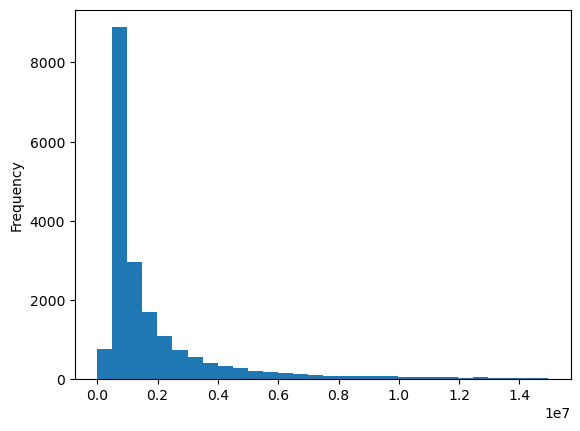

In [13]:
display(nonProfitSpending[nonProfitSpending['Total Reported Spending'] < 15000000]['Total Reported Spending'].plot.hist(bins=30));

In [14]:
politicalSpending = pd.read_csv('Political_NonProfitSpending.csv')

In [15]:
politicalSpending.head(10)

,EIN,Name,Total Reported Spending,Latest Filing
0,480546988,Kansas Farm Bureau,$9149732,September 30 2015
1,20240039,State employees Assn of new hampshire,$4880054,September 30 2015
2,522027153,Delaware standardbred owners assoc,$3548171,September 30 2015
3,720184645,International Assn of heat&frost insulators,$1162657,September 30 2015
4,630253305,Communications workers of america Local 3902,$622186,September 30 2015
5,650095041,Metro broward professional firefighters,$537343,September 30 2015
6,430164400,Associated industries of missouri,$520458,September 30 2015
7,431005405,Missouri national education Assn,$8802891,August 31 2015
8,340671426,Tree Care Industry Assn,$5898313,August 31 2015
9,166013103,Rochester teachers Assn,$1839529,August 31 2015


In [16]:
politicalSpending['Total Reported Spending'] = politicalSpending['Total Reported Spending'].apply(cast_to_number)

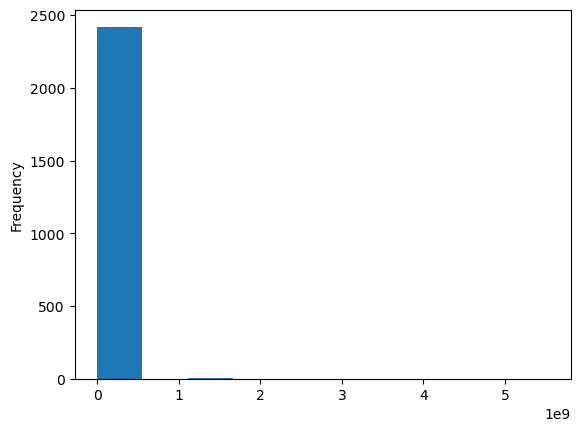

In [17]:
politicalSpending['Total Reported Spending'].plot.hist();

<Axes: ylabel='Frequency'>

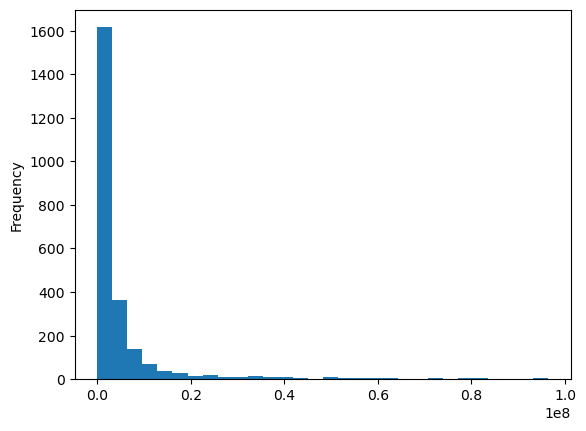

In [18]:
display(politicalSpending[politicalSpending['Total Reported Spending'] < 100000000]['Total Reported Spending'].plot.hist(bins=30));

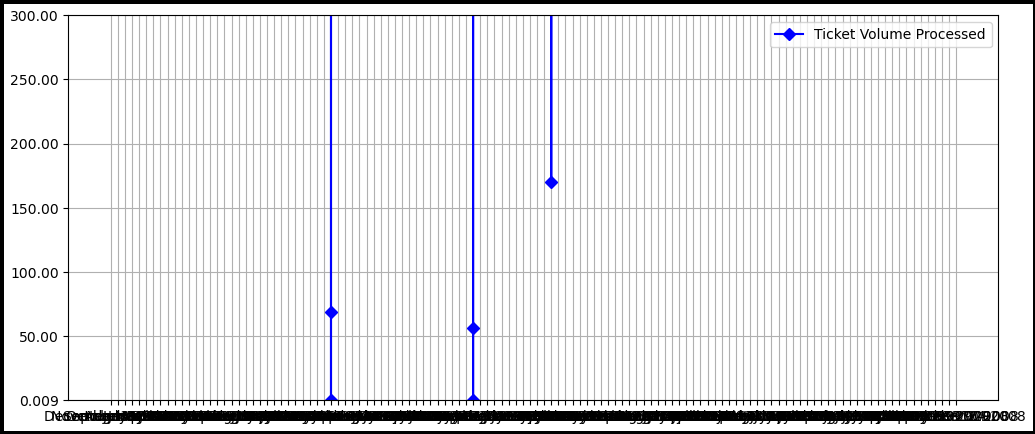

In [19]:
x = nonProfitSpending['Latest Filing']
y1 = nonProfitSpending['Total Reported Spending']


fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot()


ax.plot(x, y1, marker='D', label='Ticket Volume Processed', color='blue')

ax.legend(loc=1)
ax.yaxis.set_major_formatter('{x:9<5.2f}')
ax.set_ylim(0,300)
ax.grid()
fig.patch.set_linewidth(5)
fig.patch.set_edgecolor('black')

plt.show();

In [20]:
testdata = pd.read_csv('CORE-2019-501CE-NONPROFIT-PZ.csv')

C:\Users\patna\AppData\Local\Temp\ipykernel_19604\579882243.py:1: DtypeWarning: Columns (68,100,108) have mixed types. Specify dtype option on import or set low_memory=False.
  testdata = pd.read_csv('CORE-2019-501CE-NONPROFIT-PZ.csv')


In [21]:
testdata.head()

,EIN,ACCPER,ACTIV1,ACTIV2,ACTIV3,ADDRESS,AFCD,ASS_BOY,ASS_EOY,BOND_BOY,...,TOTREV2,TOTREVP,TOTSUPP509,TXEXMPTBNDSPROCEEDS,TXREVNUELEVIED170,TXREVNUELEVIED509,UNSECUREDNOTESEND,VALIDATION_STATE,ZIP,ZIP5
0,10018923,5,907.0,908.0,0.0,PO BOX 801,9.0,NaN,175678.0,NaN,...,223216.0,NaN,0,0.0,0,0,0.0,0,04073-0801,4073.0
1,10018927,12,907.0,908.0,0.0,120 DRUMMOND AVENUE SUITE 3,9.0,402983.0,381124.0,0.0,...,25140.0,57626.0,0,0.0,0,0,0.0,0,04901-5861,4901.0
2,10018930,4,907.0,908.0,0.0,5 VERTI DR,9.0,1026253.0,1135218.0,0.0,...,915083.0,848997.0,0,0.0,0,0,52680.0,0,04901-0727,4901.0
3,10019705,3,260.0,279.0,0.0,PO BOX 430,6.0,1878445.0,1941275.0,0.0,...,334072.0,396261.0,0,0.0,0,0,0.0,0,04429-0430,4429.0
4,10021545,6,205.0,0.0,0.0,128 STATE ST STE 101,3.0,651884.0,732881.0,0.0,...,1635788.0,1560100.0,0,0.0,0,0,0.0,0,04330-5630,4330.0


In [23]:
testdata2013 = pd.read_csv('CORE-2013-501CE-NONPROFIT-PZ.csv')

C:\Users\patna\AppData\Local\Temp\ipykernel_19604\164281284.py:1: DtypeWarning: Columns (128,144,158) have mixed types. Specify dtype option on import or set low_memory=False.
  testdata2013 = pd.read_csv('CORE-2013-501CE-NONPROFIT-PZ.csv')


In [24]:
testdata2013['EXPS'].median()

113170.0

In [25]:
testdata2005 = pd.read_csv('CORE-2005-501CE-NONPROFIT-PZ.csv')
testdata2006 = pd.read_csv('CORE-2006-501CE-NONPROFIT-PZ.csv')
testdata2007 = pd.read_csv('CORE-2007-501CE-NONPROFIT-PZ.csv')
testdata2008 = pd.read_csv('CORE-2008-501CE-NONPROFIT-PZ.csv')
testdata2009 = pd.read_csv('CORE-2009-501CE-NONPROFIT-PZ.csv')
testdata2010 = pd.read_csv('CORE-2010-501CE-NONPROFIT-PZ.csv')
testdata2011 = pd.read_csv('CORE-2011-501CE-NONPROFIT-PZ.csv')
testdata2012 = pd.read_csv('CORE-2012-501CE-NONPROFIT-PZ.csv')
testdata2013 = pd.read_csv('CORE-2013-501CE-NONPROFIT-PZ.csv')
testdata2014 = pd.read_csv('CORE-2014-501CE-NONPROFIT-PZ.csv')
testdata2015 = pd.read_csv('CORE-2015-501CE-NONPROFIT-PZ.csv')
testdata2016 = pd.read_csv('CORE-2016-501CE-NONPROFIT-PZ.csv')
testdata2017 = pd.read_csv('CORE-2017-501CE-NONPROFIT-PZ.csv')
testdata2018 = pd.read_csv('CORE-2018-501CE-NONPROFIT-PZ.csv')
testdata2019 = pd.read_csv('CORE-2019-501CE-NONPROFIT-PZ.csv')


C:\Users\patna\AppData\Local\Temp\ipykernel_19604\3474520874.py:1: DtypeWarning: Columns (0,105,119) have mixed types. Specify dtype option on import or set low_memory=False.
  testdata2005 = pd.read_csv('CORE-2005-501CE-NONPROFIT-PZ.csv')
C:\Users\patna\AppData\Local\Temp\ipykernel_19604\3474520874.py:2: DtypeWarning: Columns (116,130) have mixed types. Specify dtype option on import or set low_memory=False.
  testdata2006 = pd.read_csv('CORE-2006-501CE-NONPROFIT-PZ.csv')
C:\Users\patna\AppData\Local\Temp\ipykernel_19604\3474520874.py:3: DtypeWarning: Columns (123) have mixed types. Specify dtype option on import or set low_memory=False.
  testdata2007 = pd.read_csv('CORE-2007-501CE-NONPROFIT-PZ.csv')
C:\Users\patna\AppData\Local\Temp\ipykernel_19604\3474520874.py:4: DtypeWarning: Columns (121) have mixed types. Specify dtype option on import or set low_memory=False.
  testdata2008 = pd.read_csv('CORE-2008-501CE-NONPROFIT-PZ.csv')
C:\Users\patna\AppData\Local\Temp\ipykernel_19604\3474

In [26]:
medians = {
    2005: testdata2005['EXPS'].median(),
    2006: testdata2006['EXPS'].median(),
    2007: testdata2007['EXPS'].median(),
    2008: testdata2008['EXPS'].median(),
    2009: testdata2009['EXPS'].median(),
    2010: testdata2010['EXPS'].median(),
    2011: testdata2011['EXPS'].median(),
    2012: testdata2012['EXPS'].median(),
    2013: testdata2013['EXPS'].median(),
    2014: testdata2014['EXPS'].median(),
    2015: testdata2015['EXPS'].median(),
    2016: testdata2016['EXPS'].median(),
    2017: testdata2017['EXPS'].median(),
    2018: testdata2018['EXPS'].median(),
    2019: testdata2019['EXPS'].median(),
}

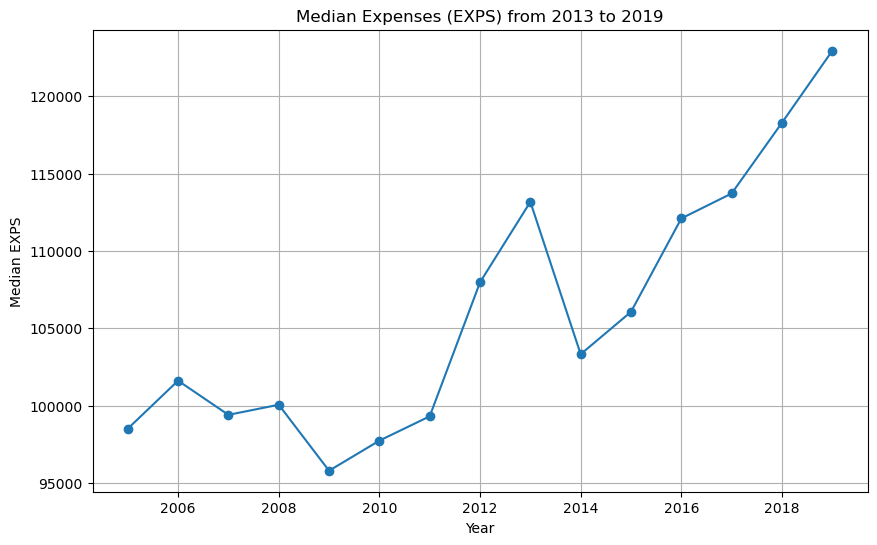

In [27]:
years = list(medians.keys())
median_values = list(medians.values())

plt.figure(figsize=(10, 6))
plt.plot(years, median_values, marker='o')
plt.title('Median Expenses (EXPS) from 2013 to 2019')
plt.xlabel('Year')
plt.ylabel('Median EXPS')
plt.grid(True)
plt.show()

In [28]:
filtered_df2018 = testdata2018[testdata2018['TAXPER'].astype(str).str.startswith('2018')]

In [29]:
filtered_df2019 = testdata2019[testdata2019['TAXPER'].astype(str).str.startswith('2019')]
filtered_df2017 = testdata2017[testdata2017['TAXPER'].astype(str).str.startswith('2017')]
filtered_df2016 = testdata2016[testdata2016['TAXPER'].astype(str).str.startswith('2016')]
filtered_df2015 = testdata2015[testdata2015['TAXPER'].astype(str).str.startswith('2015')]
filtered_df2014 = testdata2014[testdata2014['TAXPER'].astype(str).str.startswith('2014')]
filtered_df2013 = testdata2013[testdata2013['TAXPER'].astype(str).str.startswith('2013')]
filtered_df2012 = testdata2012[testdata2012['TAXPER'].astype(str).str.startswith('2012')]
filtered_df2011 = testdata2011[testdata2011['TAXPER'].astype(str).str.startswith('2011')]
filtered_df2010 = testdata2010[testdata2010['TAXPER'].astype(str).str.startswith('2010')]
filtered_df2009 = testdata2009[testdata2009['TAXPER'].astype(str).str.startswith('2009')]
filtered_df2008 = testdata2008[testdata2008['TAXPER'].astype(str).str.startswith('2008')]
filtered_df2007 = testdata2007[testdata2007['TAXPER'].astype(str).str.startswith('2007')]
filtered_df2006 = testdata2006[testdata2006['TAXPER'].astype(str).str.startswith('2006')]
filtered_df2005 = testdata2005[testdata2005['TAXPER'].astype(str).str.startswith('2005')]

In [30]:
filtered_medians = {
    2005: filtered_df2005['EXPS'].median(),
    2006: filtered_df2006['EXPS'].median(),
    2007: filtered_df2007['EXPS'].median(),
    2008: filtered_df2008['EXPS'].median(),
    2009: filtered_df2009['EXPS'].median(),
    2010: filtered_df2010['EXPS'].median(),
    2011: filtered_df2011['EXPS'].median(),
    2012: filtered_df2012['EXPS'].median(),
    2013: filtered_df2013['EXPS'].median(),
    2014: filtered_df2014['EXPS'].median(),
    2015: filtered_df2015['EXPS'].median(),
    2016: filtered_df2016['EXPS'].median(),
    2017: filtered_df2017['EXPS'].median(),
    2018: filtered_df2018['EXPS'].median(),
    2019: filtered_df2019['EXPS'].median(),
}

In [31]:
charitydata2005 = pd.read_csv('CORE-2005-501C3-CHARITIES-PZ.csv')
charitydata2006 = pd.read_csv('CORE-2006-501C3-CHARITIES-PZ.csv')
#charitydata2007 = pd.read_csv('CORE-2007-501C3-CHARITIES-PZ.csv')
charitydata2008 = pd.read_csv('CORE-2008-501C3-CHARITIES-PZ.csv')
charitydata2009 = pd.read_csv('CORE-2009-501C3-CHARITIES-PZ.csv')
charitydata2010 = pd.read_csv('CORE-2010-501C3-CHARITIES-PZ.csv')
charitydata2011 = pd.read_csv('CORE-2011-501C3-CHARITIES-PZ.csv')
charitydata2012 = pd.read_csv('CORE-2012-501C3-CHARITIES-PZ.csv')

charitydata2013 = pd.read_csv('CORE-2013-501C3-CHARITIES-PZ.csv')
charitydata2014 = pd.read_csv('CORE-2014-501C3-CHARITIES-PZ.csv')
charitydata2015 = pd.read_csv('CORE-2015-501C3-CHARITIES-PZ.csv')
charitydata2016 = pd.read_csv('CORE-2016-501C3-CHARITIES-PZ.csv')
charitydata2017 = pd.read_csv('CORE-2017-501C3-CHARITIES-PZ.csv')
charitydata2018 = pd.read_csv('CORE-2018-501C3-CHARITIES-PZ.csv')
charitydata2019 = pd.read_csv('CORE-2019-501C3-CHARITIES-PZ.csv')

C:\Users\patna\AppData\Local\Temp\ipykernel_19604\12468329.py:1: DtypeWarning: Columns (112,122,123,128,133) have mixed types. Specify dtype option on import or set low_memory=False.
  charitydata2005 = pd.read_csv('CORE-2005-501C3-CHARITIES-PZ.csv')
C:\Users\patna\AppData\Local\Temp\ipykernel_19604\12468329.py:2: DtypeWarning: Columns (114,128) have mixed types. Specify dtype option on import or set low_memory=False.
  charitydata2006 = pd.read_csv('CORE-2006-501C3-CHARITIES-PZ.csv')
C:\Users\patna\AppData\Local\Temp\ipykernel_19604\12468329.py:4: DtypeWarning: Columns (130,131,137) have mixed types. Specify dtype option on import or set low_memory=False.
  charitydata2008 = pd.read_csv('CORE-2008-501C3-CHARITIES-PZ.csv')
C:\Users\patna\AppData\Local\Temp\ipykernel_19604\12468329.py:5: DtypeWarning: Columns (36,97,121,141,192) have mixed types. Specify dtype option on import or set low_memory=False.
  charitydata2009 = pd.read_csv('CORE-2009-501C3-CHARITIES-PZ.csv')
C:\Users\patna\App

In [32]:
filtered_charity_medians = {
    2005: charitydata2005['EXPS'].median(),
    2006: charitydata2006['EXPS'].median(),
    #2007: charitydata2014['EXPS'].median(),
    2008: charitydata2008['EXPS'].median(),
    2009: charitydata2009['EXPS'].median(),
    2010: charitydata2010['EXPS'].median(),
    2011: charitydata2011['EXPS'].median(),
    2012: charitydata2012['EXPS'].median(),
    2013: charitydata2013['EXPS'].median(),
    2014: charitydata2014['EXPS'].median(),
    2015: charitydata2015['EXPS'].median(),
    2016: charitydata2016['EXPS'].median(),
    2017: charitydata2017['EXPS'].median(),
    2018: charitydata2018['EXPS'].median(),
    2019: charitydata2019['EXPS'].median(),
}

filtered_medians = {
    2005: filtered_df2005['EXPS'].median(),
    2006: filtered_df2006['EXPS'].median(),
    2007: filtered_df2007['EXPS'].median(),
    2008: filtered_df2008['EXPS'].median(),
    2009: filtered_df2009['EXPS'].median(),
    2010: filtered_df2010['EXPS'].median(),
    2011: filtered_df2011['EXPS'].median(),
    2012: filtered_df2012['EXPS'].median(),
    2013: filtered_df2013['EXPS'].median(),
    2014: filtered_df2014['EXPS'].median(),
    2015: filtered_df2015['EXPS'].median(),
    2016: filtered_df2016['EXPS'].median(),
    2017: filtered_df2017['EXPS'].median(),
    2018: filtered_df2018['EXPS'].median(),
    2019: filtered_df2019['EXPS'].median(),
}

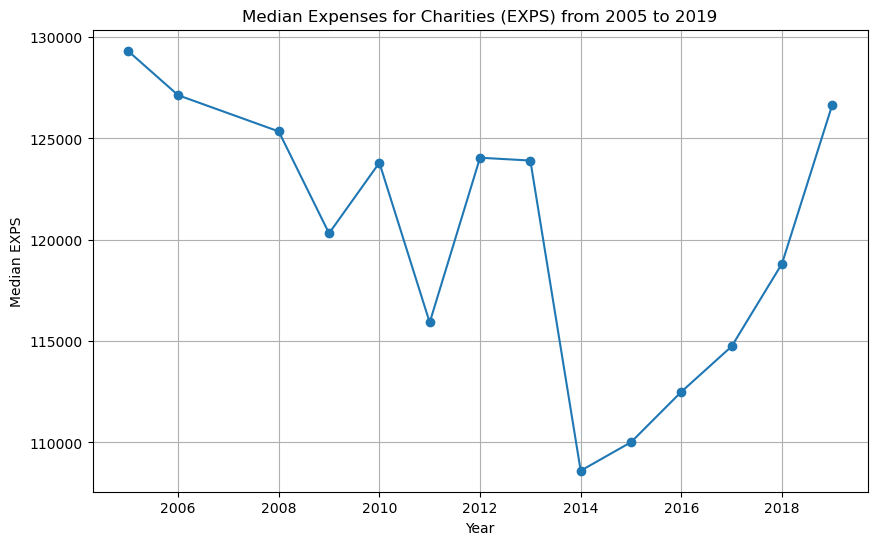

In [33]:
years = list(filtered_charity_medians.keys())
median_values = list(filtered_charity_medians.values())

plt.figure(figsize=(10, 6))
plt.plot(years, median_values, marker='o')
plt.title('Median Expenses for Charities (EXPS) from 2005 to 2019')
plt.xlabel('Year')
plt.ylabel('Median EXPS')
plt.grid(True)
plt.show()

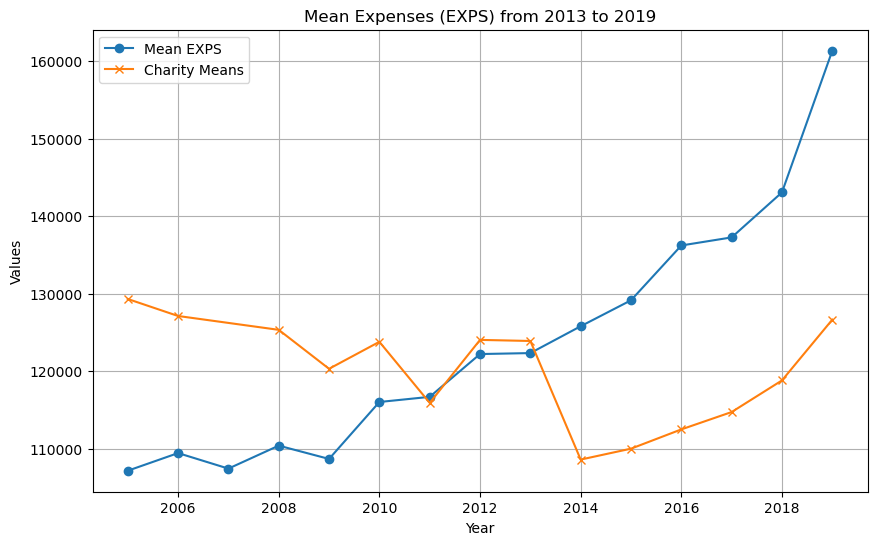

In [34]:
years1 = list(filtered_medians.keys())
median_values1 = list(filtered_medians.values())

years2 = list(filtered_charity_medians.keys())
median_values2 = list(filtered_charity_medians.values())

plt.figure(figsize=(10, 6))

plt.plot(years1, median_values1, marker='o', label='Mean EXPS')
plt.plot(years2, median_values2, marker='x', label='Charity Means')

plt.title('Mean Expenses (EXPS) from 2013 to 2019')
plt.xlabel('Year')
plt.ylabel('Values')
plt.grid(True)
plt.legend()


plt.show()

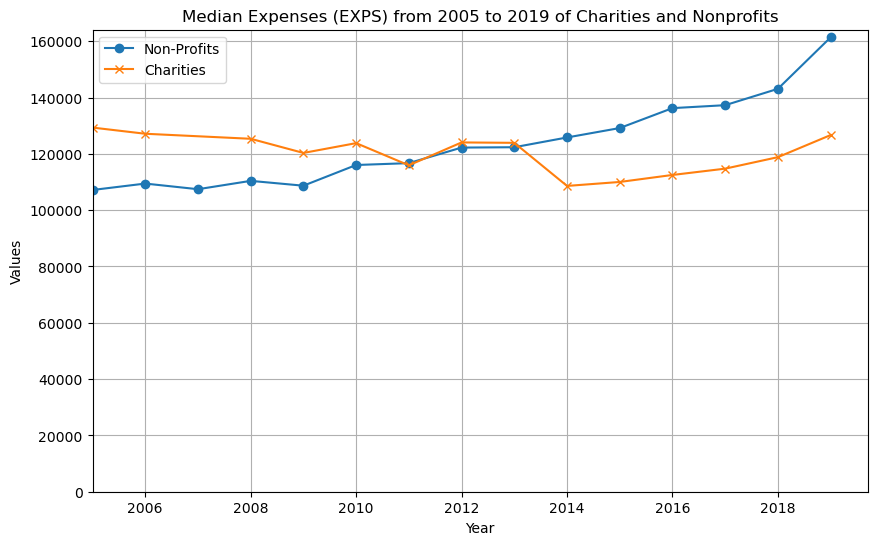

In [35]:
years1 = list(filtered_medians.keys())
median_values1 = list(filtered_medians.values())

years2 = list(filtered_charity_medians.keys())
median_values2 = list(filtered_charity_medians.values())

plt.figure(figsize=(10, 6))

plt.plot(years1, median_values1, marker='o', label='Non-Profits')
plt.plot(years2, median_values2, marker='x', label='Charities')

plt.title('Median Expenses (EXPS) from 2005 to 2019 of Charities and Nonprofits')
plt.xlabel('Year')
plt.ylabel('Values')
plt.grid(True)
plt.legend()
plt.xlim(left = 2005)
plt.ylim(bottom = 0)


plt.show() 



In [36]:
inflationData = pd.read_csv('FPCPITOTLZGUSA.csv')

In [37]:
inflationData.head()

,DATE,FPCPITOTLZGUSA
0,2005-01-01,3.392747
1,2006-01-01,3.225944
2,2007-01-01,2.852672
3,2008-01-01,3.839100
4,2009-01-01,-0.355546


In [38]:
inflationData['DATE'] = inflationData['DATE'].str[:-6]

In [39]:
inflationData.head()

,DATE,FPCPITOTLZGUSA
0,2005,3.392747
1,2006,3.225944
2,2007,2.852672
3,2008,3.839100
4,2009,-0.355546


In [40]:
unemploymentRate = {
    2005: inflationData.loc[inflationData['DATE'] == '2005', 'FPCPITOTLZGUSA'].values[0],
    2006: inflationData.loc[inflationData['DATE'] == '2006', 'FPCPITOTLZGUSA'].values[0],
    2007: inflationData.loc[inflationData['DATE'] == '2007', 'FPCPITOTLZGUSA'].values[0],
    2008: inflationData.loc[inflationData['DATE'] == '2008', 'FPCPITOTLZGUSA'].values[0],
    2009: inflationData.loc[inflationData['DATE'] == '2009', 'FPCPITOTLZGUSA'].values[0],
    2010: inflationData.loc[inflationData['DATE'] == '2010', 'FPCPITOTLZGUSA'].values[0],
    2011: inflationData.loc[inflationData['DATE'] == '2011', 'FPCPITOTLZGUSA'].values[0],
    2012: inflationData.loc[inflationData['DATE'] == '2012', 'FPCPITOTLZGUSA'].values[0],
    2013: inflationData.loc[inflationData['DATE'] == '2013', 'FPCPITOTLZGUSA'].values[0],
    2014: inflationData.loc[inflationData['DATE'] == '2014', 'FPCPITOTLZGUSA'].values[0],
    2015: inflationData.loc[inflationData['DATE'] == '2015', 'FPCPITOTLZGUSA'].values[0],
    2016: inflationData.loc[inflationData['DATE'] == '2016', 'FPCPITOTLZGUSA'].values[0],
    2017: inflationData.loc[inflationData['DATE'] == '2017', 'FPCPITOTLZGUSA'].values[0],
    2018: inflationData.loc[inflationData['DATE'] == '2018', 'FPCPITOTLZGUSA'].values[0],
    2019: inflationData.loc[inflationData['DATE'] == '2019', 'FPCPITOTLZGUSA'].values[0],
}

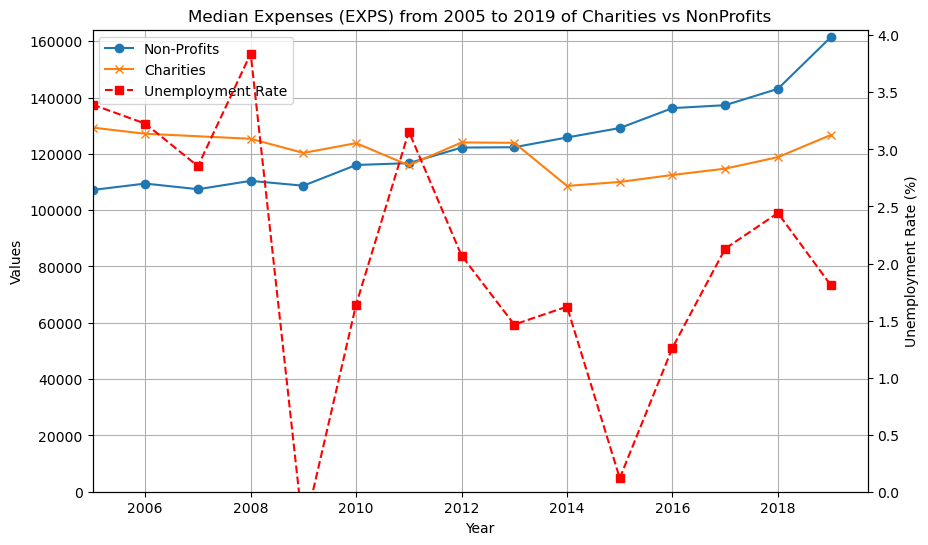

In [41]:
years1 = list(filtered_medians.keys())
median_values1 = list(filtered_medians.values())

years2 = list(filtered_charity_medians.keys())
median_values2 = list(filtered_charity_medians.values())

years3 = list(unemploymentRate.keys())
unemployment_values = list(unemploymentRate.values())

plt.figure(figsize=(10, 6))

plt.plot(years1, median_values1, marker='o', label='Non-Profits')
plt.plot(years2, median_values2, marker='x', label='Charities')

ax1 = plt.gca()
ax2 = ax1.twinx()
ax2.plot(years3, unemployment_values, color='red', linestyle='--', marker='s', label='Unemployment Rate')

# Titles and labels
plt.title('Median Expenses (EXPS) from 2005 to 2019 of Charities vs NonProfits')
ax1.set_xlabel('Year')
ax1.set_ylabel('Values')
ax2.set_ylabel('Unemployment Rate (%)')

# Grid, limits, and legend
ax1.grid(True)
ax1.set_xlim(left=2005)
ax1.set_ylim(bottom=0)
ax2.set_ylim(bottom=0)

# Combining legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.show()

C:\Users\patna\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\patna\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\patna\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\patna\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

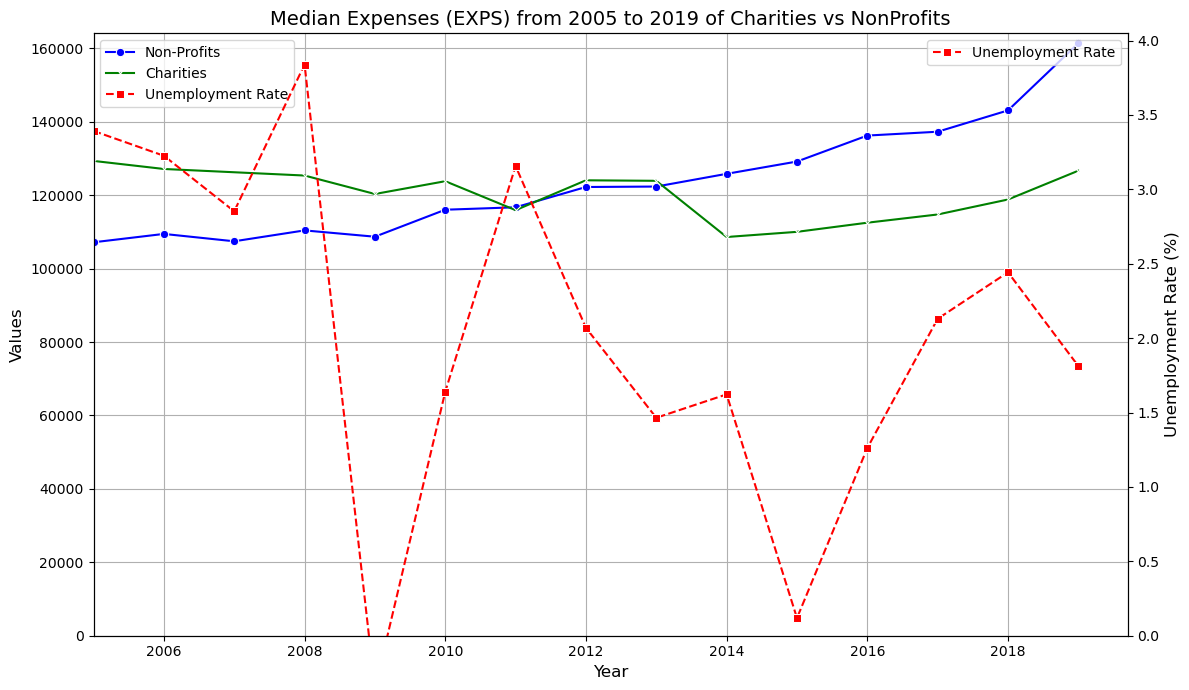

In [42]:
years1 = list(filtered_medians.keys())
median_values1 = list(filtered_medians.values())

years2 = list(filtered_charity_medians.keys())
median_values2 = list(filtered_charity_medians.values())

years3 = list(unemploymentRate.keys())
unemployment_values = list(unemploymentRate.values())

# Set up the figure and axes
fig, ax1 = plt.subplots(figsize=(12, 7))

sns.lineplot(x=years1, y=median_values1, marker='o', label='Non-Profits', ax=ax1, color='blue')
sns.lineplot(x=years2, y=median_values2, marker='x', label='Charities', ax=ax1, color='green')

# Create a second y-axis
ax2 = ax1.twinx()
sns.lineplot(x=years3, y=unemployment_values, marker='s', linestyle='--', label='Unemployment Rate', ax=ax2, color='red')

# Titles and labels
ax1.set_title('Median Expenses (EXPS) from 2005 to 2019 of Charities vs NonProfits', fontsize=14)
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Values', fontsize=12)
ax2.set_ylabel('Unemployment Rate (%)', fontsize=12)

# Grid, limits, and legend
ax1.grid(True)
ax1.set_xlim(left=2005)
ax1.set_ylim(bottom=0)
ax2.set_ylim(bottom=0)

# Combining legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plot
plt.show()


In [43]:
unemployment_rate_years = np.array(list(unemploymentRate.keys()))
nonprofit_spending_years = np.array(list(filtered_medians.keys()))
charity_spending_years = np.array(list(filtered_charity_medians.keys()))

common_years = set(unemployment_rate_years).intersection(nonprofit_spending_years).intersection(charity_spending_years)

unemployment_rate = np.array([unemploymentRate[year] for year in common_years]).reshape(-1, 1)
nonprofit_spending = np.array([filtered_medians[year] for year in common_years])
charity_spending = np.array([filtered_charity_medians[year] for year in common_years])

# Fit linear regression
model_nonprofit = LinearRegression().fit(unemployment_rate, nonprofit_spending)
model_charity = LinearRegression().fit(unemployment_rate, charity_spending)

# Slopes
slope_nonprofit = model_nonprofit.coef_[0]
slope_charity = model_charity.coef_[0]

# Standard errors
se_slope_nonprofit = np.sqrt(np.sum((model_nonprofit.predict(unemployment_rate) - nonprofit_spending) ** 2) / (len(unemployment_rate) - 2)) / np.sqrt(np.sum((unemployment_rate - np.mean(unemployment_rate)) ** 2))
se_slope_charity = np.sqrt(np.sum((model_charity.predict(unemployment_rate) - charity_spending) ** 2) / (len(unemployment_rate) - 2)) / np.sqrt(np.sum((unemployment_rate - np.mean(unemployment_rate)) ** 2))

# T-test for the difference in slopes
slope_diff = slope_nonprofit - slope_charity
se_diff = np.sqrt(se_slope_nonprofit ** 2 + se_slope_charity ** 2)
t_statistic = slope_diff / se_diff
degrees_of_freedom = len(unemployment_rate) + len(unemployment_rate) - 4  # Total df = n1 + n2 - 4
p_value = 2 * (1 - stats.t.cdf(np.abs(t_statistic), df=degrees_of_freedom))

print(f"Slope Nonprofits vs Unemployment: {slope_nonprofit}")
print(f"Slope Charities vs Unemployment: {slope_charity}")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("The relationship between spending and the unemployment rate differs significantly between Nonprofits and Charities.")
else:
    print("The relationship between spending and the unemployment rate does not differ significantly between Nonprofits and Charities.")

Slope Nonprofits vs Unemployment: -2751.17947639289
Slope Charities vs Unemployment: 2639.684947291276
T-statistic: -1.3683513504385605
P-value: 0.18387667394762341
The relationship between spending and the unemployment rate does not differ significantly between Nonprofits and Charities.


In [44]:
years1 = np.array(list(filtered_medians.keys())).reshape(-1, 1)
median_values1 = np.array(list(filtered_medians.values()))  

years2 = np.array(list(filtered_charity_medians.keys())).reshape(-1, 1)
median_values2 = np.array(list(filtered_charity_medians.values()))

# Fit linear regression models
model1 = LinearRegression().fit(years1, median_values1)
model2 = LinearRegression().fit(years2, median_values2)

# Storing Slopes
slope1 = model1.coef_[0]
slope2 = model2.coef_[0]

# Standard errors
se_slope1 = np.sqrt(np.sum((model1.predict(years1) - median_values1) ** 2) / (len(years1) - 2)) / np.sqrt(np.sum((years1 - np.mean(years1)) ** 2))
se_slope2 = np.sqrt(np.sum((model2.predict(years2) - median_values2) ** 2) / (len(years2) - 2)) / np.sqrt(np.sum((years2 - np.mean(years2)) ** 2))

# T-test for the difference in slopes
slope_diff = slope1 - slope2
se_diff = np.sqrt(se_slope1 ** 2 + se_slope2 ** 2)
t_statistic = slope_diff / se_diff
degrees_of_freedom = len(years1) + len(years2) - 4  # Total df = n1 + n2 - 4
p_value = 2 * (1 - stats.t.cdf(np.abs(t_statistic), df=degrees_of_freedom))

print(f"Slope Non-Profits: {slope1}")
print(f"Slope Charities: {slope2}")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("The slopes of the median expenses for Non-Profits and Charities are significantly different.")
else:
    print("The slopes of the median expenses for Non-Profits and Charities are not significantly different.")


Slope Non-Profits: 3287.4160714285717
Slope Charities: -789.7042313117066
T-statistic: 8.128794824708992
P-value: 1.7539987684500602e-08
The slopes of the median expenses for Non-Profits and Charities are significantly different.


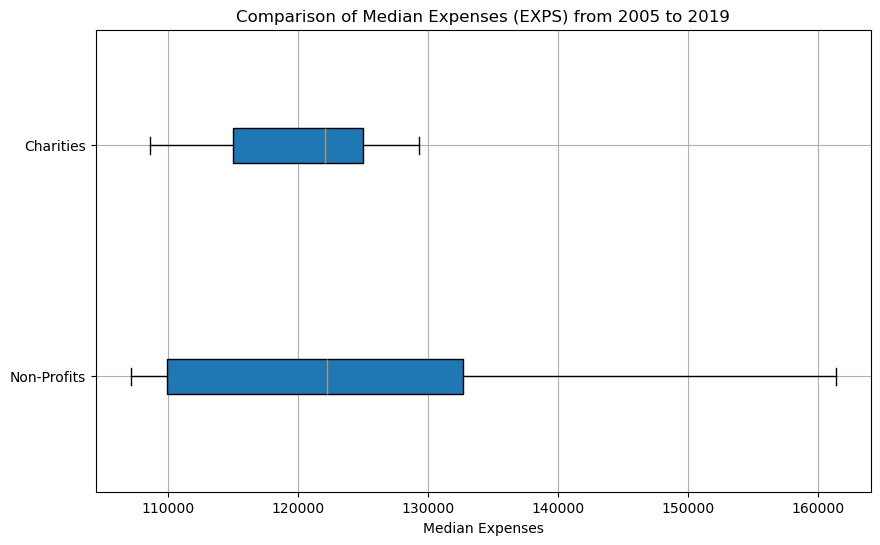

In [47]:
data = [median_values1, median_values2]
labels = ['Non-Profits', 'Charities']

plt.figure(figsize=(10, 6))
plt.boxplot(data, labels=labels, patch_artist = True, vert = False)

plt.title('Comparison of Median Expenses (EXPS) from 2005 to 2019')
plt.xlabel('Median Expenses')
plt.grid(True)

plt.show()